In [1]:
import decotengu

engine = decotengu.Engine()
engine.add_gas(0,21)

In [2]:
print("default model is ",engine.model)
# model :
# decotengu.ZH_L16B_GF  default is B
## engine.model=decotengu.ZH_L16B_GF()

# use C Model ZH_L16C_GF
# engine.model=decotengu.ZH_L16C_GF()

engine.model.gf_low=0.8
engine.model.gf_high=0.85

default model is  <decotengu.model.ZH_L16B_GF object at 0x000001F340727CA0>


In [3]:
depth = 35 # depth in m
bottom_time = 40  # time in min
profile = list(engine.calculate(depth,bottom_time))


In [4]:
print(profile)

[Step(phase="start", abs_p=1.0132, time=0.0000, gf=0.8000), Step(phase="descent", abs_p=4.5080, time=1.7500, gf=0.8000), Step(phase="const", abs_p=4.5080, time=40.0000, gf=0.8000), Step(phase="ascent", abs_p=1.9119, time=42.6000, gf=0.8000), Step(phase="deco_stop", abs_p=1.9119, time=48.6000, gf=0.8000), Step(phase="ascent", abs_p=1.6123, time=48.9000, gf=0.8167), Step(phase="deco_stop", abs_p=1.6123, time=57.9000, gf=0.8167), Step(phase="ascent", abs_p=1.3128, time=58.2000, gf=0.8333), Step(phase="deco_stop", abs_p=1.3128, time=81.2000, gf=0.8333), Step(phase="ascent", abs_p=1.0132, time=81.5000, gf=0.8500)]


In [5]:
for step in profile:
    print(step)

Step(phase="start", abs_p=1.0132, time=0.0000, gf=0.8000)
Step(phase="descent", abs_p=4.5080, time=1.7500, gf=0.8000)
Step(phase="const", abs_p=4.5080, time=40.0000, gf=0.8000)
Step(phase="ascent", abs_p=1.9119, time=42.6000, gf=0.8000)
Step(phase="deco_stop", abs_p=1.9119, time=48.6000, gf=0.8000)
Step(phase="ascent", abs_p=1.6123, time=48.9000, gf=0.8167)
Step(phase="deco_stop", abs_p=1.6123, time=57.9000, gf=0.8167)
Step(phase="ascent", abs_p=1.3128, time=58.2000, gf=0.8333)
Step(phase="deco_stop", abs_p=1.3128, time=81.2000, gf=0.8333)
Step(phase="ascent", abs_p=1.0132, time=81.5000, gf=0.8500)


In [6]:
profile[0].data

Data(tissues=((0.75112461, 0.0), (0.75112461, 0.0), (0.75112461, 0.0), (0.75112461, 0.0), (0.75112461, 0.0), (0.75112461, 0.0), (0.75112461, 0.0), (0.75112461, 0.0), (0.75112461, 0.0), (0.75112461, 0.0), (0.75112461, 0.0), (0.75112461, 0.0), (0.75112461, 0.0), (0.75112461, 0.0), (0.75112461, 0.0), (0.75112461, 0.0)), gf=0.8)

In [7]:
def profile_curve(profile):
    curve=list()
    for step in profile:
        curve.append((step.time, -engine._to_depth(step.abs_p)))
    return curve

In [8]:
for stop in engine.deco_table:
    print(stop,stop.depth,stop.time)

DecoStop(depth=9.0, time=6.0) 9.0 6.0
DecoStop(depth=6.0, time=9.0) 6.0 9.0
DecoStop(depth=3.0, time=23.0) 3.0 23.0


In [9]:
curve = profile_curve(profile)
for point in curve:
    print(point)

(0, -0.0)
(1.75, -35.0)
(40.0, -35.0)
(42.599999999999994, -9.0)
(48.599999999999994, -9.0)
(48.89999999999999, -6.0)
(57.89999999999999, -6.0)
(58.19999999999999, -3.0)
(81.19999999999999, -3.0)
(81.49999999999999, -0.0)


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(curve, columns=['time','depth'])
df.head()

,time,depth
0,0.00,-0.0
1,1.75,-35.0
2,40.00,-35.0
3,42.60,-9.0
4,48.60,-9.0


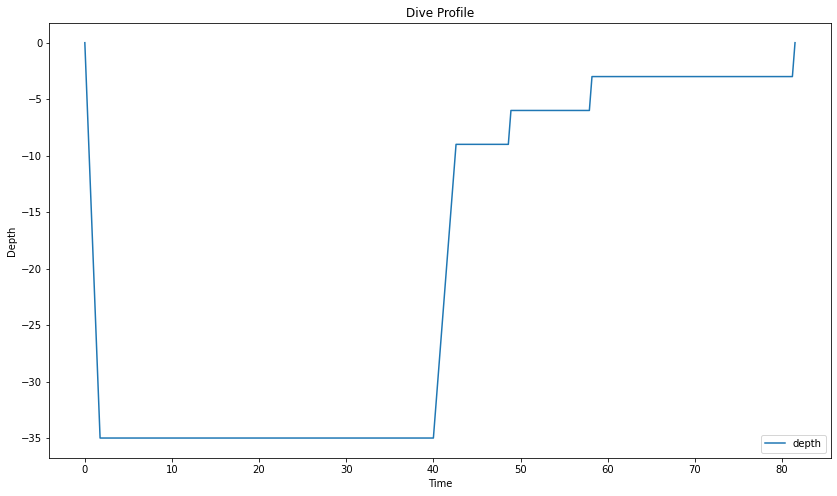

In [11]:
df.plot(kind='line', x='time', y='depth', figsize=(14,8))
plt.title('Dive Profile')
plt.ylabel('Depth')
plt.xlabel('Time')
plt.show()

DecoStop(depth=9.0, time=6.0) 46.0 -8.5
48.599999999999994
DecoStop(depth=6.0, time=9.0) 49.0 -5.5
57.89999999999999
DecoStop(depth=3.0, time=23.0) 63.0 -2.5
81.19999999999999


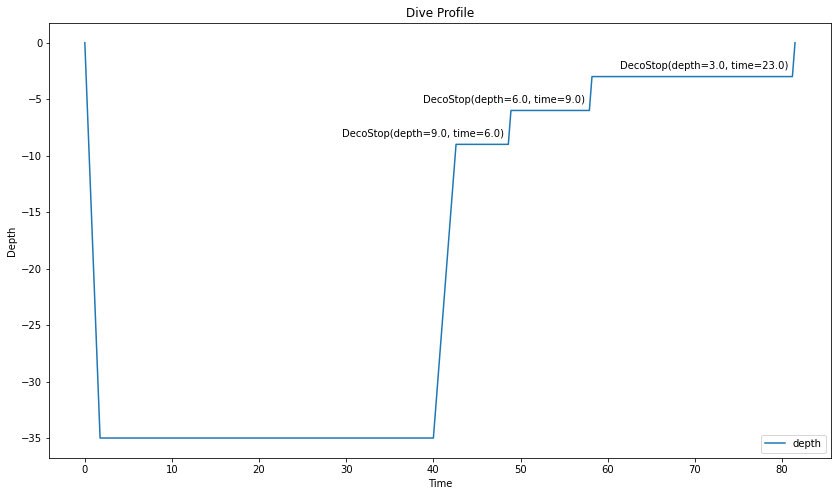

In [25]:
df.plot(kind='line', x='time', y='depth', figsize=(14,8))
plt.title('Dive Profile')
plt.ylabel('Depth')
plt.xlabel('Time')

i=4
for stop in engine.deco_table:
# Annotate Text
    plt.annotate(stop,  # text to display
             xy=(profile[i].time-0.5, -stop.depth+0.5),  # start the text at at point (time , depth)
             rotation=0,  
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='right',  # want the text to be horizontally 'left' algned.
             )
    i+=2
plt.show()